In [5]:
###Here we will import the fundamental libraries used for data science

#used for scientific computations and perform several linear algrbraic operations
import numpy as np
#used for processing of data in .csv data file
import pandas as pd
#data visualization library and used for plot interactive graph
import seaborn as sns
#to perform statistical functions and operations in the program
from scipy import stats

#keeps the plots in one place. calls image as static pngs
%matplotlib inline

#side-stepping mpl backend, used to plot the graph
import matplotlib.pyplot as plt

#subplots
import matplotlib.gridspec as gridspec

plt.style.use("ggplot")

#Hide all the warnings in ipython
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load .csv data file for observation and to get an idea about the dataset
data = pd.read_csv('Finalized_Home_Dataset.csv')

In [7]:
###Exploring data

#basic data analysis by looking at the data attributes and available features
data.head()

,sub_location,bed_rooms,bath_rooms,house_size,land_size,price,garden,commercial_area,luxury_level
0,Colombo 5,4,3,1500.0 sqft,13.0 perches,"Rs 100,000,000.00",True,True,luxury
1,Colombo 5,7,7,4500.0 sqft,11.8 perches,"Rs 190,000,000.00",True,True,luxury
2,Colombo 5,4,3,2000.0 sqft,10.0 perches,"Rs 135,000,000.00",True,True,luxury
3,Colombo 5,5,4,3000.0 sqft,11.5 perches,"Rs 207,000,000.00",False,True,luxury
4,Colombo 5,4,4,3000.0 sqft,12.9 perches,"Rs 100,000,000.00",True,True,luxury


In [4]:
data.shape

(14103, 9)

In [5]:
#feature names as a list
columns = data.columns

print("Number of columns = {}".format(len(data.columns)))
print(columns)

Number of columns = 9
Index(['sub_location', 'bed_rooms', 'bath_rooms', 'house_size', 'land_size',
       'price', 'garden', 'commercial_area', 'luxury_level'],
      dtype='object')


In [6]:
#analysis of the types of data in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14103 entries, 0 to 14102
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sub_location     14103 non-null  object
 1   bed_rooms        14103 non-null  int64 
 2   bath_rooms       14103 non-null  int64 
 3   house_size       14103 non-null  object
 4   land_size        14103 non-null  object
 5   price            14103 non-null  object
 6   garden           14103 non-null  bool  
 7   commercial_area  14103 non-null  bool  
 8   luxury_level     14103 non-null  object
dtypes: bool(2), int64(2), object(5)
memory usage: 798.9+ KB


In [16]:
sorted(list(data['sub_location'].unique()))

['Ahangama ',
 'Akkarepattu ',
 'Akuressa ',
 'Alawwa ',
 'Alutgama ',
 'Ambalangoda ',
 'Ambalantota ',
 'Ampara City ',
 'Ampitiya ',
 'Angoda ',
 'Anuradhapura City ',
 'Athurugiriya ',
 'Avissawella ',
 'Baddegama ',
 'Badulla City ',
 'Balangoda ',
 'Bandaragama ',
 'Bandarawela ',
 'Batapola ',
 'Battaramulla ',
 'Batticaloa City ',
 'Beliatta ',
 'Bentota ',
 'Beruwala ',
 'Bingiriya ',
 'Boralesgamuwa ',
 'Chilaw ',
 'Colombo 1 ',
 'Colombo 10 ',
 'Colombo 12 ',
 'Colombo 13 ',
 'Colombo 14 ',
 'Colombo 15 ',
 'Colombo 2 ',
 'Colombo 3 ',
 'Colombo 4 ',
 'Colombo 5 ',
 'Colombo 6 ',
 'Colombo 7 ',
 'Colombo 8 ',
 'Colombo 9 ',
 'Dambulla ',
 'Dankotuwa ',
 'Dehiwala ',
 'Delgoda ',
 'Deniyaya ',
 'Deraniyagala ',
 'Digana ',
 'Dikwella ',
 'Divulapitiya ',
 'Diyatalawa ',
 'Eheliyagoda ',
 'Elpitiya ',
 'Embilipitiya ',
 'Galagedara ',
 'Galewela ',
 'Galgamuwa ',
 'Galigamuwa ',
 'Galle City ',
 'Gampaha City ',
 'Gampola ',
 'Ganemulla ',
 'Gelioya ',
 'Ginigathhena ',
 'Giri

In [18]:
len(['Ahangama ', 'Akkarepattu ', 'Akuressa ', 'Alawwa ', 'Alutgama ', 'Ambalangoda ', 'Ambalantota ', 'Ampara City ', 'Ampitiya ', 'Angoda ', 'Anuradhapura City ', 'Athurugiriya ', 'Avissawella ', 'Baddegama ', 'Badulla City ', 'Balangoda ', 'Bandaragama ', 'Bandarawela ', 'Batapola ', 'Battaramulla ', 'Batticaloa City ', 'Beliatta ', 'Bentota ', 'Beruwala ', 'Bingiriya ', 'Boralesgamuwa ', 'Chilaw ', 'Colombo 1 ', 'Colombo 10 ', 'Colombo 12 ', 'Colombo 13 ', 'Colombo 14 ', 'Colombo 15 ', 'Colombo 2 ', 'Colombo 3 ', 'Colombo 4 ', 'Colombo 5 ', 'Colombo 6 ', 'Colombo 7 ', 'Colombo 8 ', 'Colombo 9 ', 'Dambulla ', 'Dankotuwa ', 'Dehiwala ', 'Delgoda ', 'Deniyaya ', 'Deraniyagala ', 'Digana ', 'Dikwella ', 'Divulapitiya ', 'Diyatalawa ', 'Eheliyagoda ', 'Elpitiya ', 'Embilipitiya ', 'Galagedara ', 'Galewela ', 'Galgamuwa ', 'Galigamuwa ', 'Galle City ', 'Gampaha City ', 'Gampola ', 'Ganemulla ', 'Gelioya ', 'Ginigathhena ', 'Giriulla ', 'Godagama ', 'Hakmana ', 'Hali Ela ', 'Hambantota City ', 'Hanwella ', 'Hatton ', 'Hikkaduwa ', 'Homagama ', 'Horana ', 'Ibbagamuwa ', 'Ingiriya ', 'Ja-Ela ', 'Jaffna City ', 'Kadawatha ', 'Kadugannawa ', 'Kaduruwela ', 'Kaduwela ', 'Kalmunai ', 'Kalutara City ', 'Kamburugamuwa ', 'Kamburupitiya ', 'Kandana ', 'Kandy City ', 'Karapitiya ', 'Kataragama ', 'Katugastota ', 'Katunayake ', 'Kegalle City ', 'Kekanadura', 'Kekirawa ', 'Kelaniya ', 'Kesbewa ', 'Kiribathgoda ', 'Kitulgala ', 'Kohuwala ', 'Kolonnawa ', 'Kottawa ', 'Kotte ', 'Kuliyapitiya ', 'Kundasale ', 'Kurunegala City ', 'Kuruwita ', 'Maharagama ', 'Malabe ', 'Marawila ', 'Matale City ', 'Matara City ', 'Matugama ', 'Mawanella ', 'Mawathagama ', 'Medawachchiya ', 'Meegoda ', 'Mihintale ', 'Minuwangoda ', 'Mirigama ', 'Monaragala City ', 'Moratuwa ', 'Mount Lavinia ', 'Nallur ', 'Narammala ', 'Nattandiya ', 'Nawala ', 'Nawalapitiya ', 'Negombo ', 'Nikaweratiya ', 'Nittambuwa ', 'Nugegoda ', 'Nuwara Eliya City ', 'Padukka ', 'Palapathwela ', 'Panadura ', 'Pannala ', 'Pannipitiya ', 'Pelmadulla ', 'Peradeniya ', 'Pilimatalawa ', 'Piliyandala ', 'Polgahawela ', 'Polonnaruwa City ', 'Puttalam City ', 'Ragama ', 'Rajagiriya ', 'Rambukkana ', 'Ratmalana ', 'Ratnapura City ', 'Rattota ', 'Ruwanwella ', 'Seeduwa ', 'Talawa ', 'Tambuttegama ', 'Tangalla ', 'Thalawathugoda', 'Tissamaharama ', 'Trincomalee City ', 'Vavuniya City ', 'Veyangoda ', 'Wadduwa ', 'Warakapola ', 'Wariyapola ', 'Wattala ', 'Wattegama ', 'Weligama ', 'Welimada ', 'Wellampitiya ', 'Wellawaya ', 'Wennappuwa ', 'Yatawatta '])

172

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 5
Integer variables: 0
Float variables: 0


In [9]:
###Clean and prepare data

# Convert "house_size" and "land_size" to numerical values
# First, remove the units and convert to float
data['house_size'] = data['house_size'].str.replace(' sqft', '').astype(float)
data['land_size'] = data['land_size'].str.replace(' perches', '').astype(float)

# Remove 'Rs', commas from the 'price' column, convert it to numeric, and then convert to millions
data['price'] = data['price'].str.replace('Rs ', '').str.replace(',', '').astype(float) / 1e6

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 2
Integer variables: 0
Float variables: 3


In [10]:
data.head()

,sub_location,bed_rooms,bath_rooms,house_size,land_size,price,garden,commercial_area,luxury_level
0,Colombo 5,4,3,1500.0,13.0,100.0,True,True,luxury
1,Colombo 5,7,7,4500.0,11.8,190.0,True,True,luxury
2,Colombo 5,4,3,2000.0,10.0,135.0,True,True,luxury
3,Colombo 5,5,4,3000.0,11.5,207.0,False,True,luxury
4,Colombo 5,4,4,3000.0,12.9,100.0,True,True,luxury


In [11]:
#describes the all statistical function of the data
data.describe()

,bed_rooms,bath_rooms,house_size,land_size,price
count,14103.000000,14103.000000,14103.000000,14103.000000,14103.000000
mean,3.991208,2.892718,2733.326656,14.520637,48.678851
std,1.323851,1.340347,1671.378430,36.982644,54.924367
min,1.000000,1.000000,150.000000,0.900000,2.000000
25%,3.000000,2.000000,1650.000000,7.500000,20.000000
50%,4.000000,3.000000,2512.000000,10.000000,33.000000
75%,5.000000,4.000000,3314.000000,15.000000,55.000000
max,13.000000,11.000000,75000.000000,3200.000000,850.000000


In [11]:
#checking unique values in different variables

unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
sub_location,172
bed_rooms,13
bath_rooms,11
house_size,1573
land_size,764
price,639
garden,2
commercial_area,2
luxury_level,3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

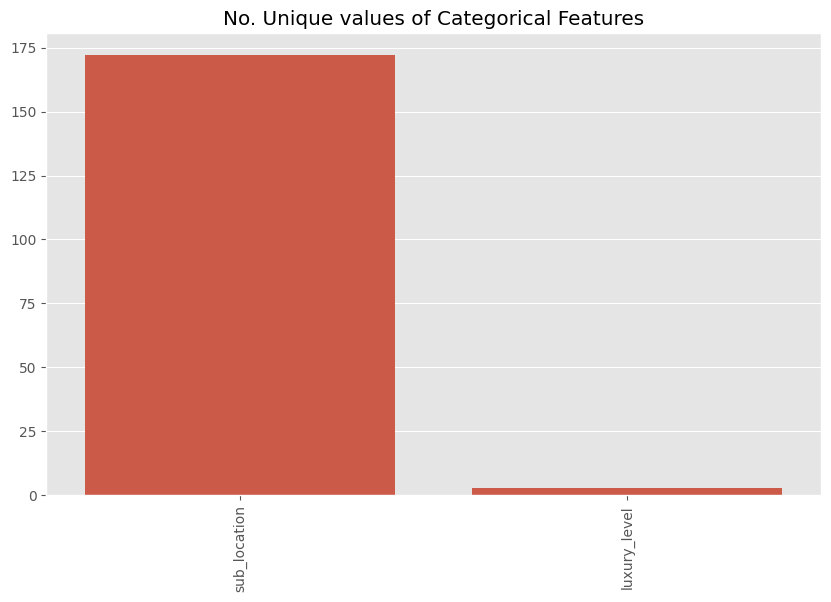

In [13]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

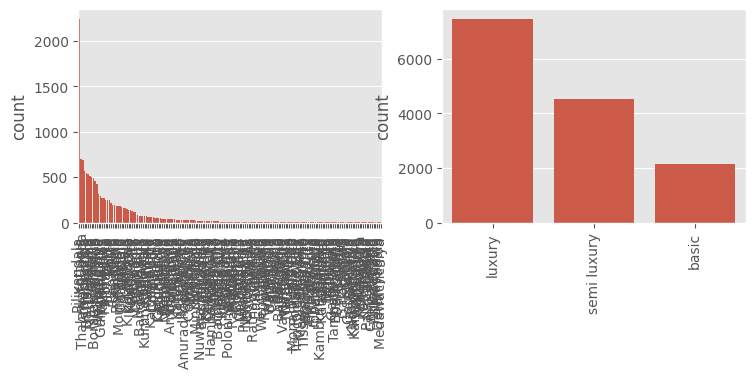

In [14]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = data[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1

In [15]:
data.head()

,sub_location,bed_rooms,bath_rooms,house_size,land_size,price,garden,commercial_area,luxury_level
0,Colombo 5,4,3,1500.0,13.0,100.0,True,True,luxury
1,Colombo 5,7,7,4500.0,11.8,190.0,True,True,luxury
2,Colombo 5,4,3,2000.0,10.0,135.0,True,True,luxury
3,Colombo 5,5,4,3000.0,11.5,207.0,False,True,luxury
4,Colombo 5,4,4,3000.0,12.9,100.0,True,True,luxury


In [16]:
#Check for duplicates from the dataset
data.duplicated().sum()

0

,Total,Percent
sub_location,0,0.0
bed_rooms,0,0.0
bath_rooms,0,0.0
house_size,0,0.0
land_size,0,0.0
price,0,0.0
garden,0,0.0
commercial_area,0,0.0
luxury_level,0,0.0


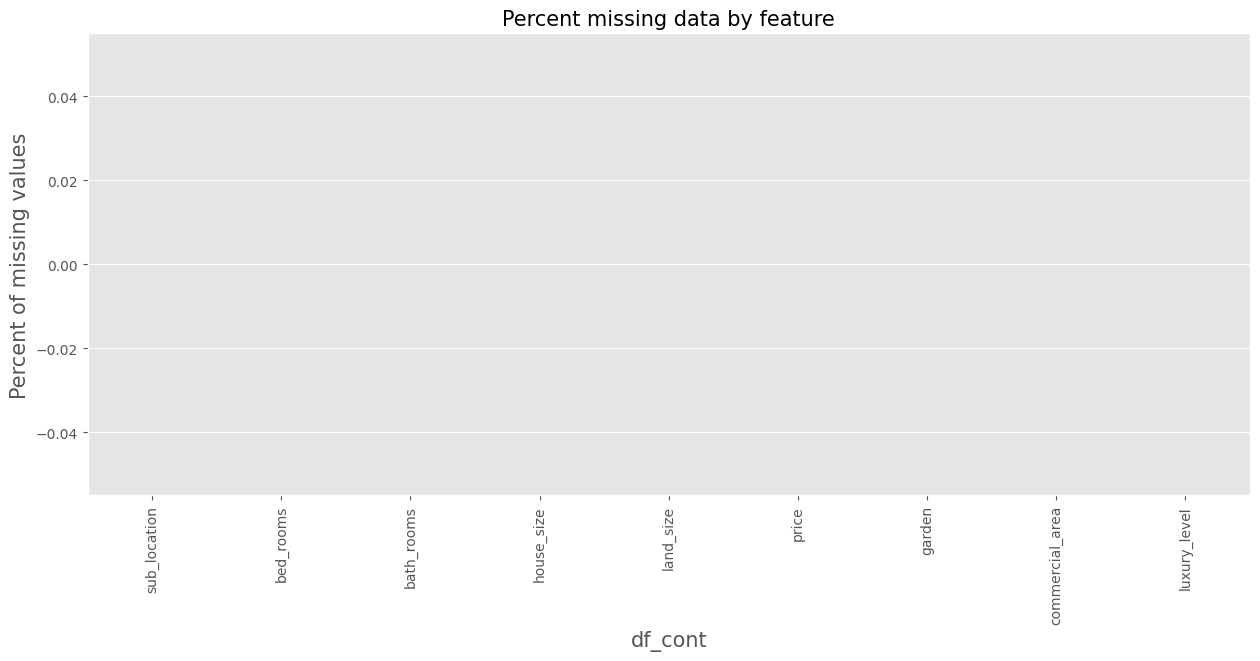

In [17]:
#Finding missing value percentage

# Percentage of missing values in each dataframe along with visualization
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum())/(data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

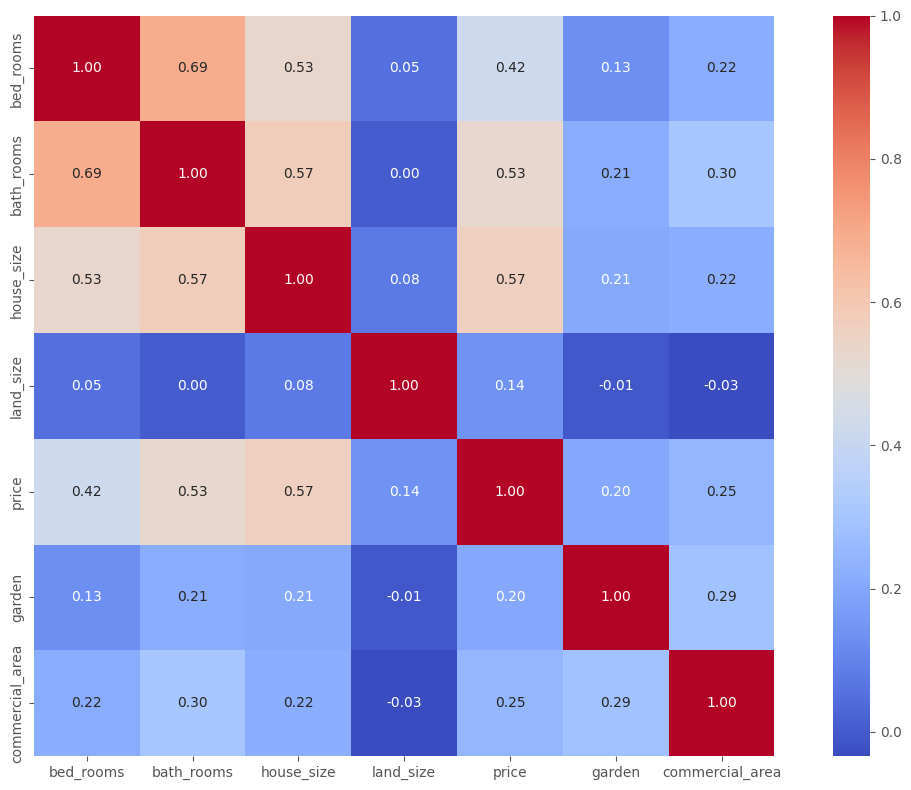

In [18]:
# Select only the numeric and boolean columns for the correlation matrix
numeric_bool_cols = data.select_dtypes(include=['number', 'bool']).columns
correlation_matrix = data[numeric_bool_cols].corr()

# Display the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

# Optional: Adjust the plot to make sure labels don't get cut off
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Which features are more correlated to the price?

# Select only the numeric and boolean columns for the correlation matrix
numeric_bool_cols = data.select_dtypes(include=['number', 'bool']).columns
correlation_matrix = data[numeric_bool_cols].corr()

# Display the correlation of all features with 'price', sorted
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print(price_corr)

price              1.000000
house_size         0.565919
bath_rooms         0.525121
bed_rooms          0.422730
commercial_area    0.245096
garden             0.200555
land_size          0.139437
Name: price, dtype: float64


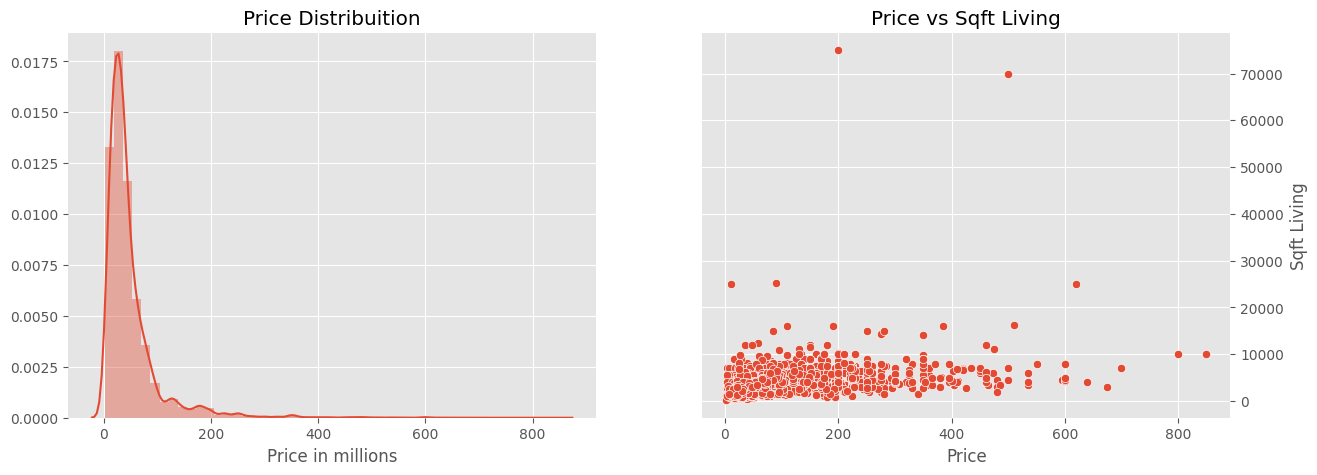

In [21]:
# Price feature
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='house_size', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [22]:
#Handling of Outliers
#Outliers are the extreme values of any feature which may or may not influence the model.
#Percentage of outliers and other descriptive statistical measures

df_outliers = pd.DataFrame(index=data.columns, columns=['outliers', 'outliers%'])
for col in data.columns:
  if any(x in str(data[col].dtype) for x in ['int', 'float']):
    df_outliers.loc[col, 'count'] = len(data)
    df_outliers.loc[col, 'q1'] = data[col].quantile(0.25)
    df_outliers.loc[col, 'q3'] = data[col].quantile(0.75)
    df_outliers.loc[col, 'iqr'] = df_outliers.loc[col, 'q3'] - df_outliers.loc[col, 'q1']
    df_outliers.loc[col, 'lower'] = df_outliers.loc[col, 'q1'] - (3 * df_outliers.loc[col, 'iqr'])
    df_outliers.loc[col, 'upper'] = df_outliers.loc[col, 'q3'] + (3 * df_outliers.loc[col, 'iqr'])
    df_outliers.loc[col, 'min'] = data[col].min()
    df_outliers.loc[col, 'max'] = data[col].max()
    df_outliers.loc[col, 'outliers'] = ((data[col] < df_outliers.loc[col, 'lower']) | (data[col] > df_outliers.loc[col,'upper'])).sum()
    df_outliers.loc[col, 'outliers%'] = np.round(df_outliers.loc[col,
    'outliers'] / len(data) *100)

In [23]:
df_outliers

,outliers,outliers%,count,q1,q3,iqr,lower,upper,min,max
sub_location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bed_rooms,5,0.0,14103.0,3.0,5.0,2.0,-3.0,11.0,1.0,13.0
bath_rooms,2,0.0,14103.0,2.0,4.0,2.0,-4.0,10.0,1.0,11.0
house_size,84,1.0,14103.0,1650.0,3314.0,1664.0,-3342.0,8306.0,150.0,75000.0
land_size,532,4.0,14103.0,7.5,15.0,7.5,-15.0,37.5,0.9,3200.0
price,601,4.0,14103.0,20.0,55.0,35.0,-85.0,160.0,2.0,850.0
garden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commercial_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
luxury_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


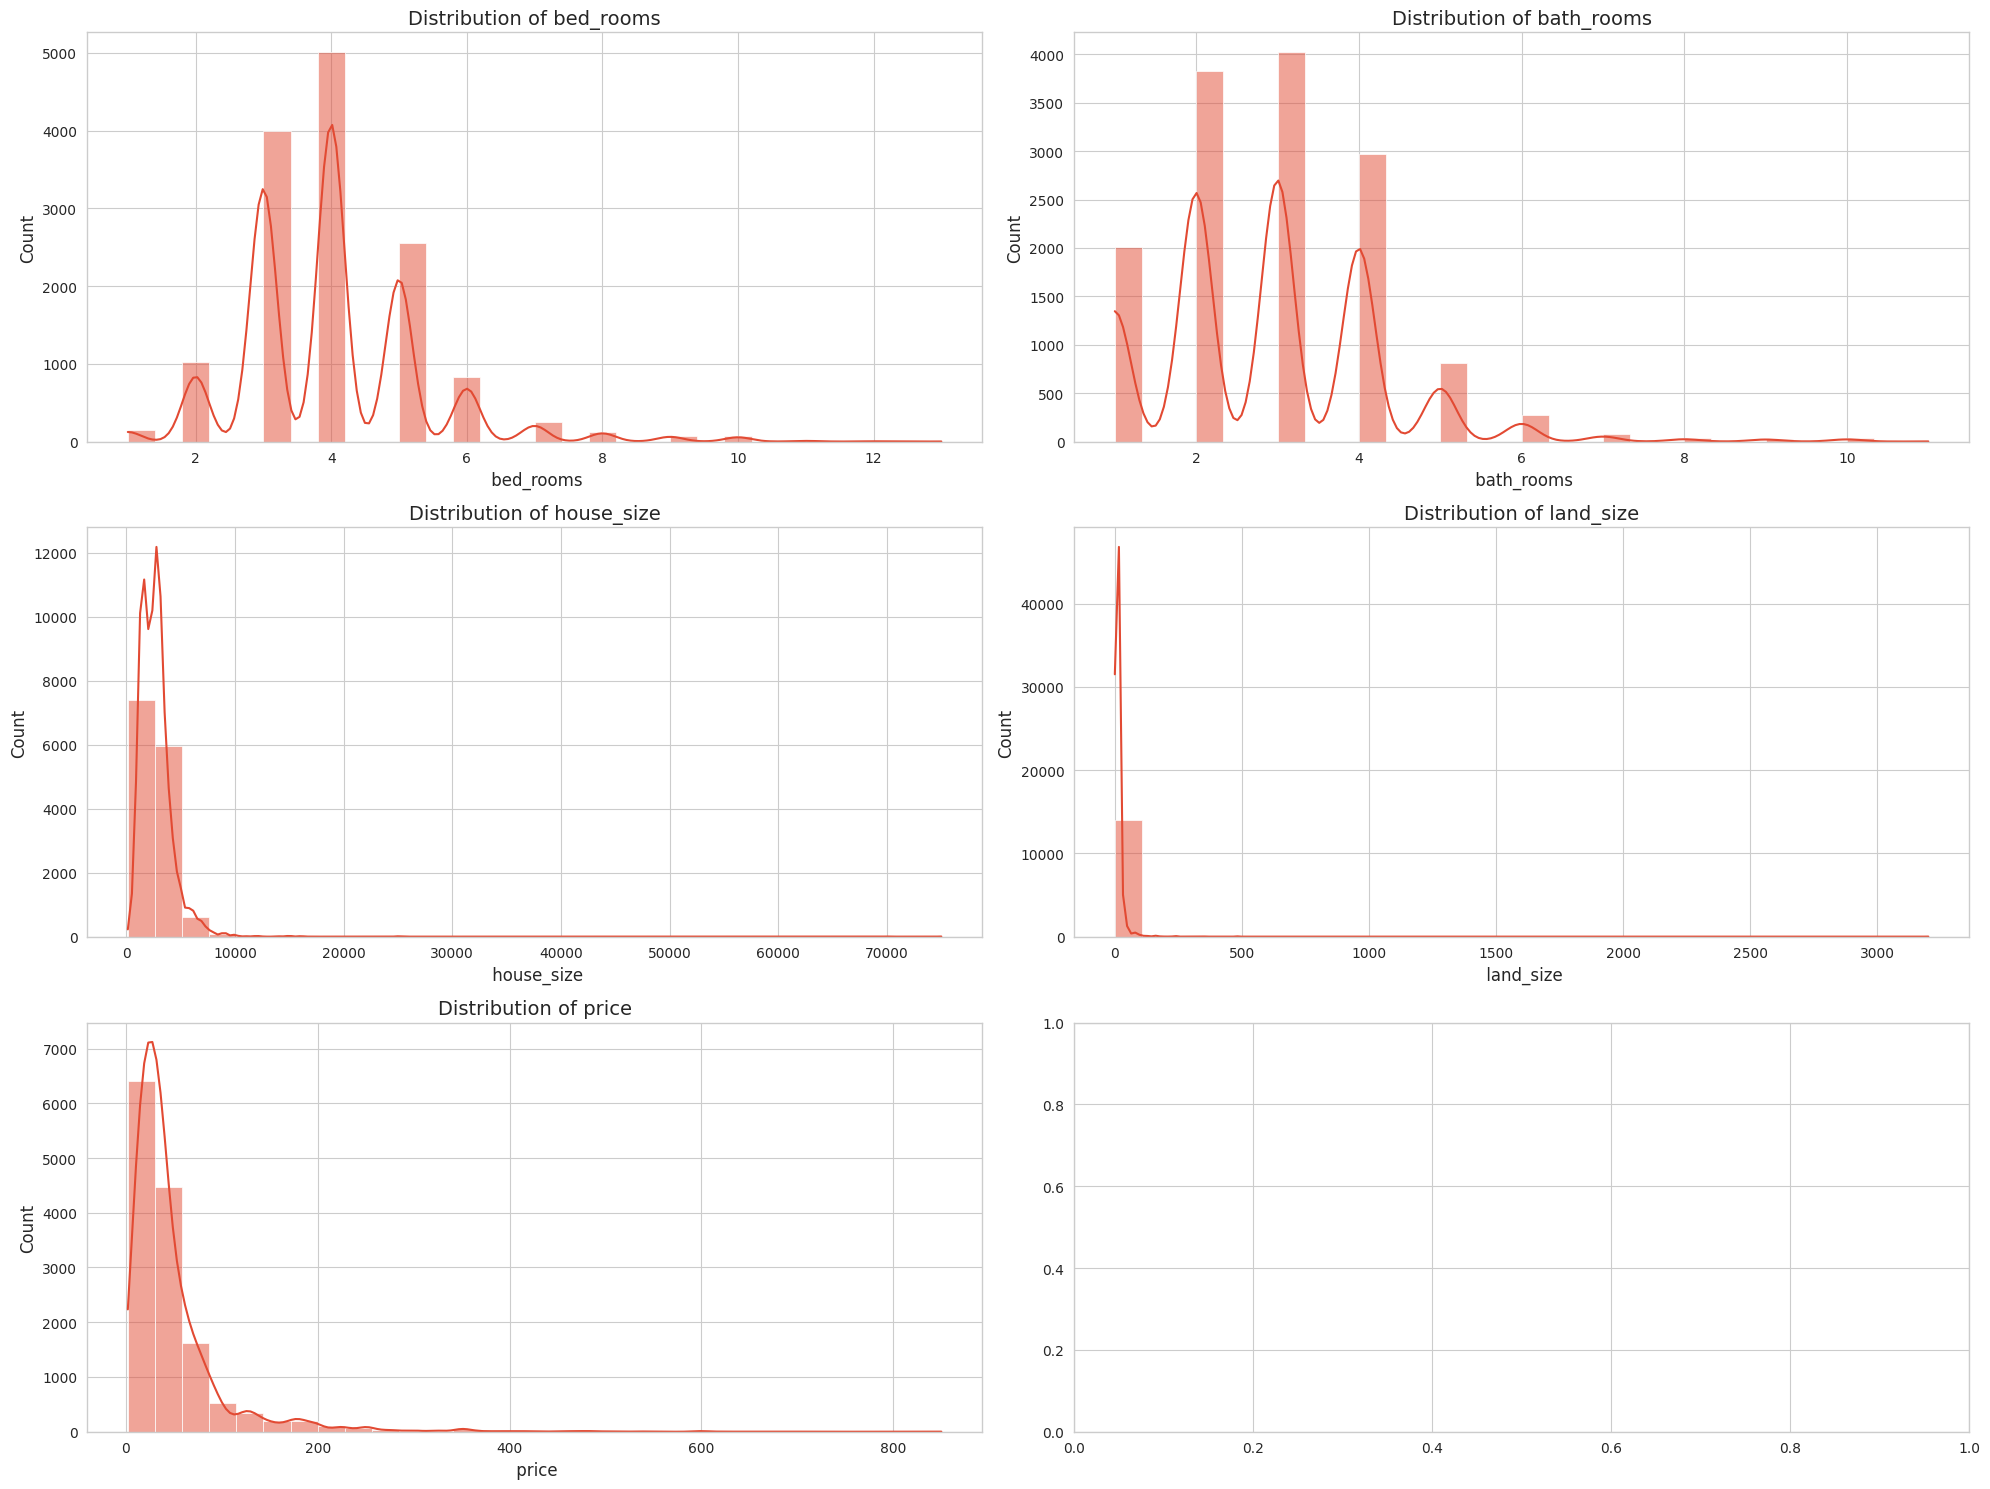

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to create histograms and box plots for numerical features
def plot_distribution(data, features, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(20, 15))
    ax = ax.flatten() # To convert the 2D array of axes to 1D for easy iteration

    for i, feature in enumerate (features):
        sns.histplot(data[feature], bins=30, kde=True, ax=ax[i])
        ax[i].set_title(f'Distribution of {feature}', fontsize=14)
        ax[i].set_xlabel(f' {feature}', fontsize=12)
        ax[i].set_ylabel('Count', fontsize=12)

    plt.tight_layout()
    plt.show()

# List of numerical features
numerical_features = ['bed_rooms', 'bath_rooms', 'house_size', 'land_size', 'price']

# Call the function to plot distributions
plot_distribution(data, numerical_features, rows=3, cols=2)

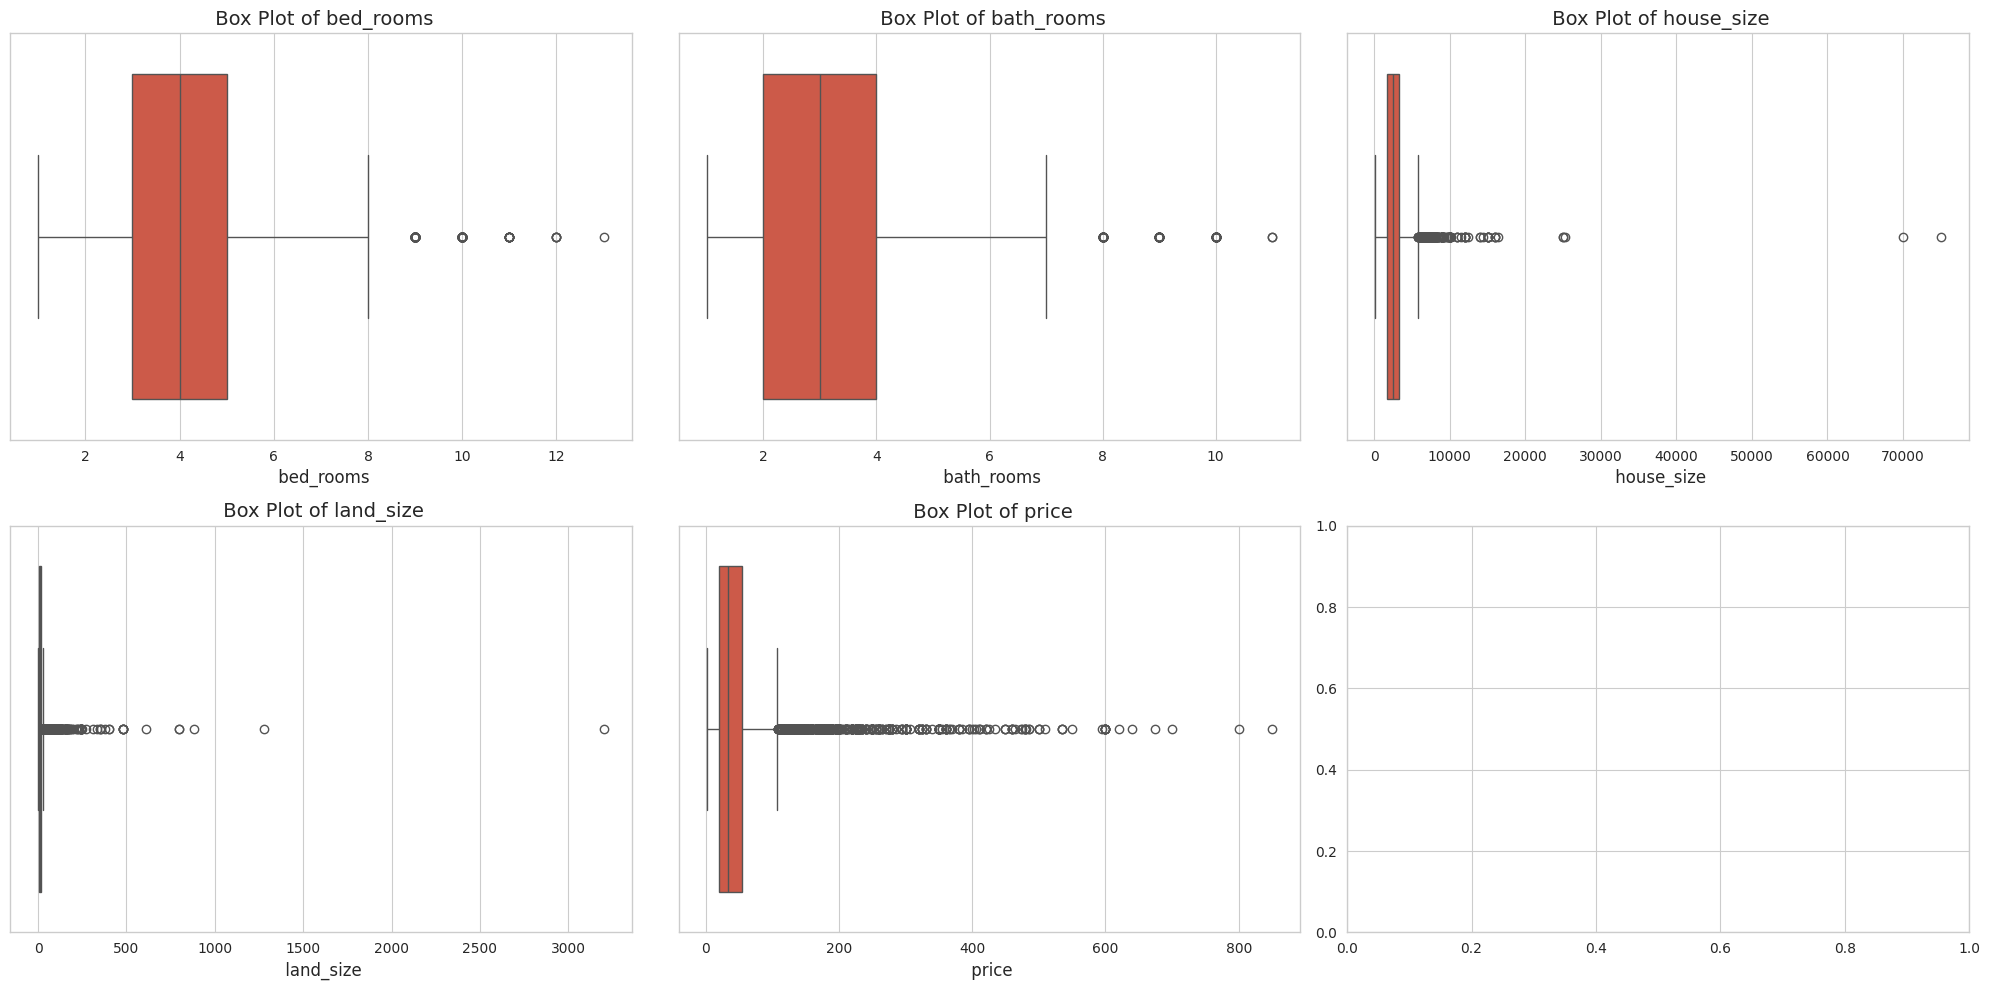

In [25]:
# Define a function to create box plots for numerical features
def plot_boxplots (data, features, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
    ax = ax.flatten() # To convert the 2D array of axes to 10 for easy iteration

    for i, feature in enumerate(features):
        sns.boxplot (x=data[feature], ax=ax[i])
        ax[i].set_title(f' Box Plot of {feature}', fontsize=14)
        ax[i].set_xlabel(f' {feature}', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the function to plot box plots
plot_boxplots (data, numerical_features, rows=2, cols=3)

<Axes: title={'center': 'Log Normal'}, xlabel='price'>

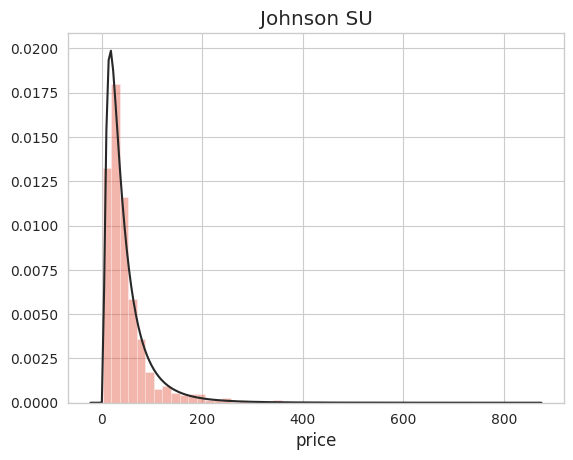

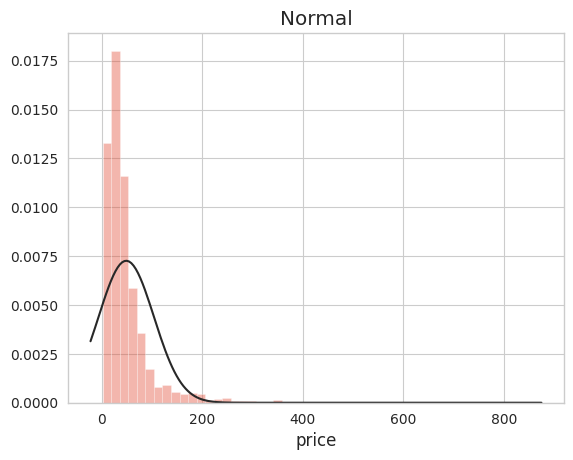

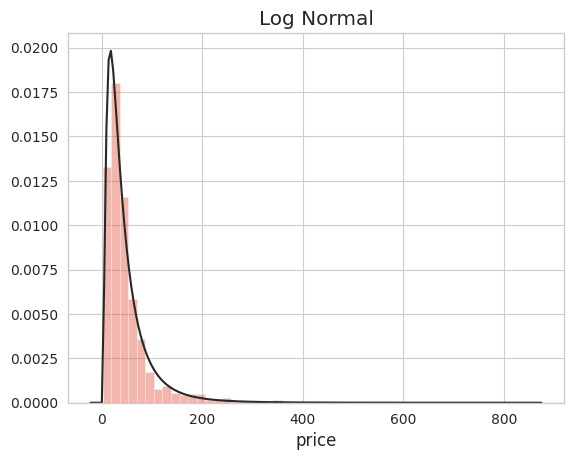

In [26]:
# Transform the most skewed variable (target variable)
plt.figure(1);
plt.title('Johnson SU')
sns.distplot(data['price'], kde=False, fit=stats.johnsonsu)

plt.figure(2);
plt.title('Normal')
sns.distplot(data['price'], kde=False, fit=stats.norm)

plt.figure(3);
plt.title('Log Normal')
sns.distplot(data['price'], kde=False, fit=stats.lognorm)

In [12]:
# It is apparent that price doesn't follow normal distribution, so before performing regression it has to be transformed.
# While log transformation does pretty good job, best fit is unbounded Johnson distribution.

data['price'] = np.log1p(data['price'])

In [13]:
# Apply log transformation to other variables with low skewness

data['house_size'] = np.log1p(data['house_size'])
data['land_size'] = np.log1p(data['land_size'])

In [14]:
# Integer Encoder – For Label categorical features

from sklearn.preprocessing import OneHotEncoder

s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['sub_location', 'luxury_level']
No. of. categorical features:  2


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for sub_location
label_encoder_sub_location = LabelEncoder()
data['sub_location_encoded'] = label_encoder_sub_location.fit_transform(data['sub_location'])

# Initialize LabelEncoder for luxury_level
label_encoder_luxury_level = LabelEncoder()
data['luxury_level_encoded'] = label_encoder_luxury_level.fit_transform(data['luxury_level'])

# Initialize LabelEncoder for garden
label_encoder_garden = LabelEncoder()
data['garden_encoded'] = label_encoder_garden.fit_transform(data['garden'])

# Initialize LabelEncoder for commercial_area
label_encoder_commercial_area = LabelEncoder()
data['commercial_area_encoded'] = label_encoder_commercial_area.fit_transform(data['commercial_area'])

# Now your categorical features are integer encoded in the 'data' DataFrame

In [16]:
# Inspect the mapping for sub_location
print("Column: sub_location")
print("Original Values:", label_encoder_sub_location.classes_)
print("Encoded Labels:", np.unique(data['sub_location_encoded']))
print()

# Inspect the mapping for luxury_level
print("Column: luxury_level")
print("Original Values:", label_encoder_luxury_level.classes_)
print("Encoded Labels:", np.unique(data['luxury_level_encoded']))
print()

# Inspect the mapping for garden
print("Column: garden")
print("Original Values:", label_encoder_garden.classes_)
print("Encoded Labels:", np.unique(data['garden_encoded']))
print()

# Inspect the mapping for commercial_area
print("Column: commercial_area")
print("Original Values:", label_encoder_commercial_area.classes_)
print("Encoded Labels:", np.unique(data['commercial_area_encoded']))
print()

Column: sub_location
Original Values: ['Ahangama ' 'Akkarepattu ' 'Akuressa ' 'Alawwa ' 'Alutgama '
 'Ambalangoda ' 'Ambalantota ' 'Ampara City ' 'Ampitiya ' 'Angoda '
 'Anuradhapura City ' 'Athurugiriya ' 'Avissawella ' 'Baddegama '
 'Badulla City ' 'Balangoda ' 'Bandaragama ' 'Bandarawela ' 'Batapola '
 'Battaramulla ' 'Batticaloa City ' 'Beliatta ' 'Bentota ' 'Beruwala '
 'Bingiriya ' 'Boralesgamuwa ' 'Chilaw ' 'Colombo 1 ' 'Colombo 10 '
 'Colombo 12 ' 'Colombo 13 ' 'Colombo 14 ' 'Colombo 15 ' 'Colombo 2 '
 'Colombo 3 ' 'Colombo 4 ' 'Colombo 5 ' 'Colombo 6 ' 'Colombo 7 '
 'Colombo 8 ' 'Colombo 9 ' 'Dambulla ' 'Dankotuwa ' 'Dehiwala ' 'Delgoda '
 'Deniyaya ' 'Deraniyagala ' 'Digana ' 'Dikwella ' 'Divulapitiya '
 'Diyatalawa ' 'Eheliyagoda ' 'Elpitiya ' 'Embilipitiya ' 'Galagedara '
 'Galewela ' 'Galgamuwa ' 'Galigamuwa ' 'Galle City ' 'Gampaha City '
 'Gampola ' 'Ganemulla ' 'Gelioya ' 'Ginigathhena ' 'Giriulla '
 'Godagama ' 'Hakmana ' 'Hali Ela ' 'Hambantota City ' 'Hanwella '
 'Ha

In [17]:
# Drop the original categorical columns
data.drop(object_cols, axis=1, inplace=True)

In [18]:
# Rename the integer-encoded columns with the original column names
data.rename(columns={'sub_location_encoded': 'sub_location', 'luxury_level_encoded': 'luxury_level'}, inplace=True)

In [19]:
# Drop the original boolean columns
data.drop(['garden', 'commercial_area'], axis = 1, inplace=True)

In [20]:
# Rename the integer-encoded columns with the original column names
data.rename(columns={'garden_encoded': 'garden', 'commercial_area_encoded': 'commercial_area'}, inplace=True)

In [21]:
data.head()

,bed_rooms,bath_rooms,house_size,land_size,price,sub_location,luxury_level,garden,commercial_area
0,4,3,7.313887,2.639057,4.615121,36,1,1,1
1,7,7,8.412055,2.549445,5.252273,36,1,1,1
2,4,3,7.601402,2.397895,4.912655,36,1,1,1
3,5,4,8.006701,2.525729,5.337538,36,1,0,1
4,4,4,8.006701,2.631889,4.615121,36,1,1,1


In [22]:
# Splitting Dataset into Training and Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
Y = data['price']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11282, 8)
(2821, 8)
(11282,)
(2821,)


In [24]:
# Scale the data and use RobustScaler to minimize the effect of outliers

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Scale the X_train set
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns= X_train.columns)

# Scale the X_test set
X_test_scaled = scaler.transform(X_test.values)
X_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns= X_test.columns)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

def evaluate_regression_model(model, X, y):
    """
    Evaluate a regression model and print common regression metrics.

    Parameters:
    - model: Trained regression model
    - X: Features (independent variables)
    - y: Target variable (dependent variable)
    """
    # Make predictions
    y_pred = model.predict(X)

    # Calculate regression metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    # explained variance score: best possible score is 1 and lower values are worse
    evs = explained_variance_score(y, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
    print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))
    print("**********************************************")
    print("R-squared (R2): {:.4f}".format(r2))
    print("Variance Regression Score (EVS): {:.4f}".format(evs))

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)

print("Evaluation metrics for the RandomForestRegressor model:")
evaluate_regression_model(model_RFR, X_test, Y_test)

Evaluation metrics for the RandomForestRegressor model:
Mean Absolute Error (MAE): 0.1711
Mean Squared Error (MSE): 0.0674
Root Mean Squared Error (RMSE): 0.2596
Mean Absolute Percentage Error (MAPE): 0.0519
**********************************************
R-squared (R2): 0.8996
Variance Regression Score (EVS): 0.8996


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomForestRegressor
rf_model = RandomForestRegressor()

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=rf_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
rf_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for RandomForestRegressor:")
print(rf_random_search.best_estimator_)

print("Negative Mean Squared Error:", rf_random_search.best_score_)

print("Evaluation metrics for the RandomForestRegressor model:")
evaluate_regression_model(rf_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for RandomForestRegressor:
RandomForestRegressor(max_features='auto', n_estimators=200)
Negative Mean Squared Error: -0.06448017503298022
Evaluation metrics for the RandomForestRegressor model:
Mean Absolute Error (MAE): 0.1710
Mean Squared Error (MSE): 0.0671
Root Mean Squared Error (RMSE): 0.2590
Mean Absolute Percentage Error (MAPE): 0.0518
**********************************************
R-squared (R2): 0.9001
Variance Regression Score (EVS): 0.9001


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, Y_train)

print("Evaluation metrics for the Gradient Boosting Regressor model:")
evaluate_regression_model(model_gb, X_test, Y_test)

Evaluation metrics for the Gradient Boosting Regressor model:
Mean Absolute Error (MAE): 0.2086
Mean Squared Error (MSE): 0.0799
Root Mean Squared Error (RMSE): 0.2826
Mean Absolute Percentage Error (MAPE): 0.0620
**********************************************
R-squared (R2): 0.8810
Variance Regression Score (EVS): 0.8812


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define hyperparameter grid for GradientBoostingRegressor
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Perform RandomizedSearchCV
gb_random_search = RandomizedSearchCV(gb_model, param_distributions=gb_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
gb_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for GradientBoostingRegressor:")
print(gb_random_search.best_estimator_)

print("Negative Mean Squared Error:", gb_random_search.best_score_)

print("Evaluation metrics for the Gradient Boosting Regressor model:")
evaluate_regression_model(gb_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for GradientBoostingRegressor:
GradientBoostingRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=300)
Negative Mean Squared Error: -0.06435712767245408
Evaluation metrics for the Gradient Boosting Regressor model:
Mean Absolute Error (MAE): 0.1815
Mean Squared Error (MSE): 0.0642
Root Mean Squared Error (RMSE): 0.2534
Mean Absolute Percentage Error (MAPE): 0.0551
**********************************************
R-squared (R2): 0.9043
Variance Regression Score (EVS): 0.9045


In [45]:
!pip install catboost
from catboost import CatBoostRegressor

model_catboost = CatBoostRegressor()
model_catboost.fit(X_train, Y_train, verbose=False)

print("Evaluation metrics for the CatBoost Regressor model:")
evaluate_regression_model(model_catboost, X_test, Y_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.9 MB/s eta 0:00:00
Evaluation metrics for the CatBoost Regressor model:
Mean Absolute Error (MAE): 0.1810
Mean Squared Error (MSE): 0.0640
Root Mean Squared Error (RMSE): 0.2529
Mean Absolute Percentage Error (MAPE): 0.0546
**********************************************
R-squared (R2): 0.9047
Variance Regression Score (EVS): 0.9049


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# Define hyperparameter grid for CatBoostRegressor
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Create CatBoostRegressor
catboost_model = CatBoostRegressor()

# Perform RandomizedSearchCV
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=catboost_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
catboost_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for CatBoostRegressor:")
print(catboost_random_search.best_estimator_)

print("Negative Mean Squared Error:", catboost_random_search.best_score_)

print("Evaluation metrics for the CatBoost Regressor model:")
evaluate_regression_model(catboost_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.6811718	total: 7.39ms	remaining: 2.21s
1:	learn: 0.5869587	total: 12ms	remaining: 1.79s
2:	learn: 0.5138252	total: 16.8ms	remaining: 1.66s
3:	learn: 0.4650352	total: 18.5ms	remaining: 1.37s
4:	learn: 0.4186300	total: 23.7ms	remaining: 1.4s
5:	learn: 0.3872163	total: 28.7ms	remaining: 1.41s
6:	learn: 0.3649586	total: 33.3ms	remaining: 1.4s
7:	learn: 0.3481499	total: 38.3ms	remaining: 1.4s
8:	learn: 0.3353750	total: 43.3ms	remaining: 1.4s
9:	learn: 0.3267993	total: 48.3ms	remaining: 1.4s
10:	learn: 0.3181495	total: 53.1ms	remaining: 1.4s
11:	learn: 0.3102052	total: 58ms	remaining: 1.39s
12:	learn: 0.3047643	total: 63.1ms	remaining: 1.39s
13:	learn: 0.2993497	total: 67.8ms	remaining: 1.39s
14:	learn: 0.2955430	total: 73.1ms	remaining: 1.39s
15:	learn: 0.2914454	total: 78.3ms	remaining: 1.39s
16:	learn: 0.2877914	total: 82.9ms	remaining: 1.38s
17:	learn: 0.2860528	total: 87.8ms	remaining: 1.38s
18:	learn: 0.2845746	t

In [47]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

print("Evaluation metrics for the XGBoost Regressor model:")
evaluate_regression_model(model_xgb, X_test, Y_test)

Evaluation metrics for the XGBoost Regressor model:
Mean Absolute Error (MAE): 0.1800
Mean Squared Error (MSE): 0.0666
Root Mean Squared Error (RMSE): 0.2581
Mean Absolute Percentage Error (MAPE): 0.0544
**********************************************
R-squared (R2): 0.9008
Variance Regression Score (EVS): 0.9009


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid for XGBRegressor
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

# Create XGBRegressor
xgb_model = XGBRegressor()

# Perform RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
xgb_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for XGBRegressor:")
print(xgb_random_search.best_estimator_)

print("Negative Mean Squared Error:", xgb_random_search.best_score_)

print("Evaluation metrics for the XGBoost Regressor model:")
evaluate_regression_model(xgb_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for XGBRegressor:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Negative Mean Squared Error: -0.06276177072758926
Evaluation metrics for the XGBoost Regressor model:
Mean Absolute Error (MAE): 0.1790
Mean Squared Error (MSE): 0.

In [49]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, Y_train)

print("Evaluation metrics for the LGBM Regressor model:")
evaluate_regression_model(model_lgbm, X_test, Y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 11282, number of used features: 8
[LightGBM] [Info] Start training from score 3.550272
Evaluation metrics for the LGBM Regressor model:
Mean Absolute Error (MAE): 0.1829
Mean Squared Error (MSE): 0.0650
Root Mean Squared Error (RMSE): 0.2550
Mean Absolute Percentage Error (MAPE): 0.0553
**********************************************
R-squared (R2): 0.9031
Variance Regression Score (EVS): 0.9033


In [50]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

# Define hyperparameter grid for LGBMRegressor
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [0, 1, 5]
}

# Create LGBMRegressor
lgbm_model = LGBMRegressor()

# Perform RandomizedSearchCV
lgbm_random_search = RandomizedSearchCV(lgbm_model, param_distributions=lgbm_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
lgbm_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for LGBMRegressor:")
print(lgbm_random_search.best_estimator_)

print("Negative Mean Squared Error:", lgbm_random_search.best_score_)

print("Evaluation metrics for the LGBM Regressor model:")
evaluate_regression_model(lgbm_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 11282, number of used features: 8
[LightGBM] [Info] Start training from score 3.550272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [51]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_hist_gb = HistGradientBoostingRegressor()
model_hist_gb.fit(X_train, Y_train)

print("Evaluation metrics for the HistGradientBoostingRegressor model:")
evaluate_regression_model(model_hist_gb, X_test, Y_test)

Evaluation metrics for the HistGradientBoostingRegressor model:
Mean Absolute Error (MAE): 0.1858
Mean Squared Error (MSE): 0.0668
Root Mean Squared Error (RMSE): 0.2584
Mean Absolute Percentage Error (MAPE): 0.0561
**********************************************
R-squared (R2): 0.9005
Variance Regression Score (EVS): 0.9006


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define hyperparameter grid for HistGradientBoostingRegressor
hist_gb_param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 4],
    'l2_regularization': [0.0, 0.1, 0.2]
}

# Create HistGradientBoostingRegressor
hist_gb_model = HistGradientBoostingRegressor()

# Perform RandomizedSearchCV
hist_gb_random_search = RandomizedSearchCV(hist_gb_model, param_distributions=hist_gb_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
hist_gb_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for HistGradientBoostingRegressor:")
print(hist_gb_random_search.best_estimator_)

print("Negative Mean Squared Error:", hist_gb_random_search.best_score_)

print("Evaluation metrics for the HistGradientBoostingRegressor model:")
evaluate_regression_model(hist_gb_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for HistGradientBoostingRegressor:
HistGradientBoostingRegressor(max_depth=5, max_iter=300, min_samples_leaf=4)
Negative Mean Squared Error: -0.06427190182916813
Evaluation metrics for the HistGradientBoostingRegressor model:
Mean Absolute Error (MAE): 0.1850
Mean Squared Error (MSE): 0.0666
Root Mean Squared Error (RMSE): 0.2580
Mean Absolute Percentage Error (MAPE): 0.0561
**********************************************
R-squared (R2): 0.9008
Variance Regression Score (EVS): 0.9010


In [53]:
from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor()
model_et.fit(X_train, Y_train)

print("Evaluation metrics for the ExtraTreesRegressor model:")
evaluate_regression_model(model_et, X_test, Y_test)

Evaluation metrics for the ExtraTreesRegressor model:
Mean Absolute Error (MAE): 0.1778
Mean Squared Error (MSE): 0.0717
Root Mean Squared Error (RMSE): 0.2678
Mean Absolute Percentage Error (MAPE): 0.0538
**********************************************
R-squared (R2): 0.8931
Variance Regression Score (EVS): 0.8933


In [54]:
# Performing RandomizedSearchCV for ExtraTreesRegressor
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create ExtraTreesRegressor
et_model = ExtraTreesRegressor()

# Perform RandomizedSearchCV
et_random_search = RandomizedSearchCV(et_model, param_distributions=et_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
et_random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters for ExtraTreesRegressor:")
print(et_random_search.best_estimator_)

print("Negative Mean Squared Error:", et_random_search.best_score_)

print("Evaluation metrics for the ExtraTreesRegressor model:")
evaluate_regression_model(et_random_search, X_test, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for ExtraTreesRegressor:
ExtraTreesRegressor(max_features='auto', n_estimators=300)
Negative Mean Squared Error: -0.06875639003340994
Evaluation metrics for the ExtraTreesRegressor model:
Mean Absolute Error (MAE): 0.1763
Mean Squared Error (MSE): 0.0711
Root Mean Squared Error (RMSE): 0.2666
Mean Absolute Percentage Error (MAPE): 0.0534
**********************************************
R-squared (R2): 0.8941
Variance Regression Score (EVS): 0.8942


In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))  # Adjust dropout rate
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))  # Adjust dropout rate
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False))  # Reduce the number of LSTM layers
model.add(Dropout(0.3))  # Adjust dropout rate
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with gradient clipping and L2 regularization
optimizer = Adam(lr=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Reduce learning rate if val_loss is not improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.summary()

# Model Training
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=100, verbose=1, callbacks=[reduce_lr])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 8, 256)            264192    
                                                                 
 dropout_3 (Dropout)         (None, 8, 256)            0         
                                                                 
 batch_normalization_2 (Bat  (None, 8, 256)            1024      
 chNormalization)                                                
                                                                 
 lstm_4 (LSTM)               (None, 8, 128)            197120    
                                                                 
 dropout_4 (Dropout)         (None, 8, 128)            0         
                                                                 
 batch_normalization_3 (Bat  (None, 8, 128)            512       
 chNormalization)                                     

<Axes: >

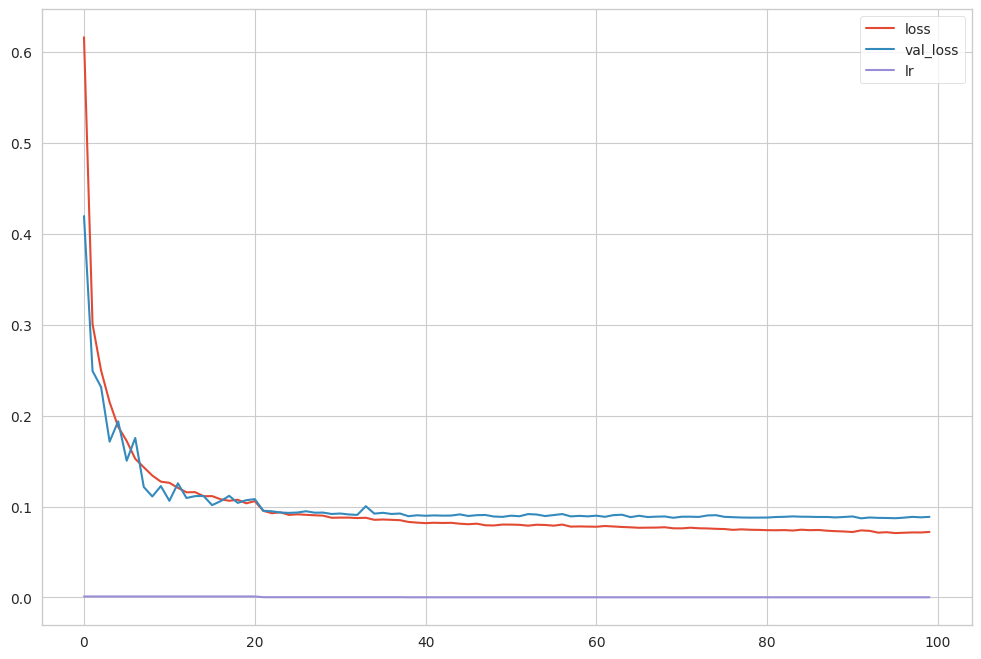

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [61]:
print("Evaluation metrics for the Neural Network model:")
evaluate_regression_model(model, X_test, Y_test)

Evaluation metrics for the Neural Network model:
89/89 [==============================] - 4s 30ms/step
Mean Absolute Error (MAE): 0.2109
Mean Squared Error (MSE): 0.0886
Root Mean Squared Error (RMSE): 0.2976
Mean Absolute Percentage Error (MAPE): 0.0619
**********************************************
R-squared (R2): 0.8680
Variance Regression Score (EVS): 0.8698


In [62]:
# The finalized models in order from the top-performing model to the least-performing model based on the obtained evaluation metrics

# CatBoostRegressor (Hyperparameter Tuning)
# LGBMRegressor (Hyperparameter Tuning)
# GradientBoostingRegressor (Hyperparameter Tuning)
# XGBRegressor (Hyperparameter Tuning)
# HistGradientBoostingRegressor (Hyperparameter Tuning)
# RandomForestRegressor (Hyperparameter Tuning)
# ExtraTreesRegressor (Hyperparameter Tuning)
# Deep Learning Model - Recurrent Neural Networks (RNNs) and LSTM

In [63]:
# Stacking Ensemble:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into train and validation sets
X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Generating predictions from base models
base_model_predictions = []

# Generate predictions from each base model
for model in [rf_random_search, gb_random_search, catboost_random_search, xgb_random_search, lgbm_random_search, hist_gb_random_search, et_random_search, model]:
    if isinstance(model, Sequential):  # If the model is a deep learning model
        predictions = model.predict(X_val_stack)
    else:  # For other models
        predictions = model.predict(X_val_stack)
        predictions = np.reshape(predictions, (-1, 1))  # Reshape predictions to have one feature
    base_model_predictions.append(predictions)

# Transpose predictions to use as features
X_train_stacked = np.hstack(base_model_predictions)

# Train a meta-model (e.g., linear regression) on top of base model predictions
meta_model = LinearRegression()
meta_model.fit(X_train_stacked, y_val_stack)

# Generating predictions on the test set
base_model_predictions_test = []

# Generate predictions from each base model on the test set
for model in [rf_random_search, gb_random_search, catboost_random_search, xgb_random_search, lgbm_random_search, hist_gb_random_search, et_random_search, model]:
    if isinstance(model, Sequential):  # If the model is a deep learning model
        predictions_test = model.predict(X_test)
    else:  # For other models
        predictions_test = model.predict(X_test)
        predictions_test = np.reshape(predictions_test, (-1, 1))  # Reshape predictions to have one feature
    base_model_predictions_test.append(predictions_test)

# Transpose test set predictions to use as features
X_test_stacked = np.hstack(base_model_predictions_test)

# Generate final predictions using meta-model
stacked_predictions = meta_model.predict(X_test_stacked)

# Evaluate the stacking ensemble
print("Evaluation Metrics for Stacking Ensemble:")
evaluate_regression_model(meta_model, X_test_stacked, Y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
71/71 [==============================] - 1s 19ms/step
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
89/89 [==============================] - 2s 19ms/step
Evaluation Metrics for Stacking Ensemble:
Mean Absolute Error (MAE): 0.1768
Mean Squared Error (MSE): 0.0714
Root Mean Squared Error (RMSE): 0.2672
Mean Absolute Percentage Error (MAPE): 0.0536
**********************************************
R-squared (R2): 0.8936
Variance Regression Score (EVS): 0.8938


In [65]:
# Voting Ensemble:

from sklearn.ensemble import VotingRegressor

# Define the voting ensemble with models
voting_ensemble = VotingRegressor(estimators=[
    ('RFR', rf_random_search),
    ('GB', gb_random_search),
    ('CatBoost', catboost_random_search),
    ('XGB', xgb_random_search),
    ('LGBM', lgbm_random_search),
    ('Hist GB', hist_gb_random_search),
    ('ET', et_random_search)
], n_jobs=-1)

# Fit the voting ensemble on the training data
voting_ensemble.fit(X_train, Y_train)

# Generate predictions on the test set
voting_predictions = voting_ensemble.predict(X_test)

# Evaluate the voting ensemble
print("Evaluation Metrics for Voting Ensemble:")
evaluate_regression_model(voting_ensemble, X_test, Y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Evaluation Metrics for Voting Ensemble:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error (MAE): 0.1724
Mean Squared Error (MSE): 0.0605
Root Mean Squared Error (RMSE): 0.2461
Mean Absolute Percentage Error (MAPE): 0.0523
**********************************************
R-squared (R2): 0.9098
Variance Regression Score (EVS): 0.9099


In [66]:
# Stacking Ensemble with Top Models:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting the top-performing models based on evaluation metrics
top_models = [catboost_random_search, lgbm_random_search, gb_random_search]

# Splitting the data into train and validation sets
X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Generating predictions from base models
base_model_predictions = []

# Generate predictions from each top-performing model
for model in top_models:
    model.fit(X_train_stack, y_train_stack)
    predictions = model.predict(X_val_stack)
    base_model_predictions.append(predictions)

# Transpose predictions to use as features
X_train_stacked = np.vstack(base_model_predictions).T

# Train a meta-model (e.g., linear regression) on top of base model predictions
meta_model_1 = LinearRegression()
meta_model_1.fit(X_train_stacked, y_val_stack)

# Generate predictions on the test set
base_model_predictions_test = []

# Generate predictions from each top-performing model on the test set
for model in top_models:
    predictions_test = model.predict(X_test)
    base_model_predictions_test.append(predictions_test)

# Transpose test set predictions to use as features
X_test_stacked = np.vstack(base_model_predictions_test).T

# Generate final predictions using meta-model
stacked_predictions = meta_model_1.predict(X_test_stacked)

# Evaluate the stacking ensemble with top models
print("Evaluation Metrics for Stacking Ensemble with Top Models:")
evaluate_regression_model(meta_model_1, X_test_stacked, Y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.6791918	total: 6.59ms	remaining: 1.97s
1:	learn: 0.5853095	total: 10.5ms	remaining: 1.56s
2:	learn: 0.5145623	total: 13.4ms	remaining: 1.33s
3:	learn: 0.4592662	total: 17.3ms	remaining: 1.28s
4:	learn: 0.4285224	total: 18.6ms	remaining: 1.1s
5:	learn: 0.3937855	total: 23ms	remaining: 1.13s
6:	learn: 0.3693795	total: 27ms	remaining: 1.13s
7:	learn: 0.3482968	total: 31ms	remaining: 1.13s
8:	learn: 0.3371059	total: 34.9ms	remaining: 1.13s
9:	learn: 0.3285398	total: 39ms	remaining: 1.13s
10:	learn: 0.3192078	total: 43.4ms	remaining: 1.14s
11:	learn: 0.3106884	total: 47.5ms	remaining: 1.14s
12:	learn: 0.3060023	total: 51.7ms	remaining: 1.14s
13:	learn: 0.3025689	total: 55.5ms	remaining: 1.13s
14:	learn: 0.2978908	total: 59.7ms	remaining: 1.13s
15:	learn: 0.2938055	total: 63.6ms	remaining: 1.13s
16:	learn: 0.2894686	total: 67.7ms	remaining: 1.13s
17:	learn: 0.2857919	total: 71.7ms	remaining: 1.12s
18:	learn: 0.2829978	

In [70]:
# Voting Ensemble with Top Models:
from sklearn.ensemble import VotingRegressor

# Define the top-performing models
top_models = [
    ('CatBoost', catboost_random_search),
    ('LGBM', lgbm_random_search),
    ('GB', gb_random_search),
    ('XGB', xgb_random_search)
]

# Create the voting ensemble with top models
voting_ensemble_1 = VotingRegressor(estimators=top_models, n_jobs=-1)

# Fit the voting ensemble on the training data
voting_ensemble_1.fit(X_train, Y_train)

# Generate predictions on the test set
voting_predictions = voting_ensemble_1.predict(X_test)

# Evaluate the voting ensemble with top models
print("Evaluation Metrics for Voting Ensemble with Top Models:")
evaluate_regression_model(voting_ensemble_1, X_test, Y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Evaluation Metrics for Voting Ensemble with Top Models:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error (MAE): 0.1751
Mean Squared Error (MSE): 0.0610
Root Mean Squared Error (RMSE): 0.2471
Mean Absolute Percentage Error (MAPE): 0.0530
**********************************************
R-squared (R2): 0.9091
Variance Regression Score (EVS): 0.9092


In [71]:
# The best performing model is the voting ensemble model(voting_ensemble) with below models.
          # CatBoostRegressor (Hyperparameter Tuning)
          # LGBMRegressor (Hyperparameter Tuning)
          # GradientBoostingRegressor (Hyperparameter Tuning)
          # XGBRegressor (Hyperparameter Tuning)
          # HistGradientBoostingRegressor (Hyperparameter Tuning)
          # RandomForestRegressor (Hyperparameter Tuning)
          # ExtraTreesRegressor (Hyperparameter Tuning)

# Voting ensemble model metrics are displayed below.

          # Mean Absolute Error (MAE): 0.1724
          # Mean Squared Error (MSE): 0.0605
          # Root Mean Squared Error (RMSE): 0.2461
          # Mean Absolute Percentage Error (MAPE): 0.0523
          # **********************************************
          # R-squared (R2): 0.9098
          # Variance Regression Score (EVS): 0.9099

In [72]:
#  Implement cross-validation to assess the performance of FINALIZED Voting Ensemble

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(voting_ensemble, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values
cv_scores = -cv_scores

# Compute mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print cross-validation scores
print("Cross-Validation Scores (RMSE):", cv_scores)
print("Mean RMSE:", mean_cv_score)
print("Standard Deviation RMSE:", std_cv_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Cross-Validation Scores (RMSE): [0.06152896 0.05823393 0.06031289 0.05425819 0.06580069]
Mean RMSE: 0.06002693113934558
Standard Deviation RMSE: 0.0037991436773696634


In [ ]:
# Mean RMSE: The mean Root Mean Squared Error (RMSE) across the cross-validation folds is approximately 0.0600.
# This indicates the average deviation between the actual target values and the predicted values by your model.
# Lower values of RMSE indicate better model performance.

# Standard Deviation RMSE: The standard deviation of RMSE across the cross-validation folds is approximately 0.004.
# This measures the variability or spread of the RMSE values across different folds.
# A lower standard deviation suggests that the model's performance is consistent across folds, while a higher standard deviation indicates more variability in performance.

# Since the mean RMSE is relatively low and the standard deviation of RMSE is also quite small,
# it suggests that the model is performing well and is not overfitting.
# The consistency in performance across folds and the small spread of RMSE values indicate that the model's performance generalizes well to unseen data.

In [2]:
import joblib

# Save the voting ensemble model to a file
# joblib.dump(voting_ensemble, 'voting_ensemble.pkl')

In [3]:
# Load the saved voting ensemble model from file
loaded_model = joblib.load('voting_ensemble.pkl')

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

# Generate predictions on the test set using the loaded model
voting_predictions = loaded_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, voting_predictions)
mse = mean_squared_error(Y_test, voting_predictions)
rmse = mean_squared_error(Y_test, voting_predictions, squared=False)
mape = mean_absolute_percentage_error(Y_test, voting_predictions)
r2 = r2_score(Y_test, voting_predictions)
evs = explained_variance_score(Y_test, voting_predictions)

# Print the evaluation metrics
print("Evaluation Metrics for Loaded Voting Ensemble Model:")
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))
print("R-squared (R2): {:.4f}".format(r2))
print("Variance Regression Score (EVS): {:.4f}".format(evs))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Evaluation Metrics for Loaded Voting Ensemble Model:
Mean Absolute Error (MAE): 0.1724
Mean Squared Error (MSE): 0.0605
Root Mean Squared Error (RMSE): 0.2461
Mean Absolute Percentage Error (MAPE): 0.0523
R-squared (R2): 0.9098
Variance Regression Score (EVS): 0.9099


In [26]:
data.tail()

,bed_rooms,bath_rooms,house_size,land_size,price,sub_location,luxury_level,garden,commercial_area
14098,4,3,8.006701,2.564949,3.401197,76,2,1,1
14099,3,2,7.057037,2.079442,3.091042,76,2,0,1
14100,4,2,7.824446,2.322388,3.465736,128,1,1,1
14101,3,2,7.673688,1.987874,3.417727,76,2,0,1
14102,2,2,8.006701,2.772589,3.113515,86,2,0,1


In [28]:
import numpy as np

# Example test record
test_record = np.array([[4, 3, np.log1p(20000.0), np.log1p(40.0), 36, 1, 1, 1]])

# Scale the test record using the same scaler
test_record_scaled = scaler.transform(test_record)

# Convert the scaled test record back to a DataFrame
test_record_scaled_df = pd.DataFrame(test_record_scaled, columns=X_train.columns)

# Use the loaded voting ensemble model to make predictions on the preprocessed test record
predicted_price = loaded_model.predict(test_record_scaled_df)

# Print or display the predicted price
print("Predicted Price:", np.expm1(predicted_price))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Predicted Price: [244.15473581]


In [81]:
!pip install lime
import lime
import lime.lime_tabular

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)

# Explain the prediction using LIME
lime_exp = lime_explainer.explain_instance(test_record_scaled_df.values[0], loaded_model.predict)

# Display LIME explanation
print("LIME Explanation:")
lime_exp.show_in_notebook()  # This will display the explanation in Jupyter Notebook

# Get the top n most influential features from LIME explanation
lime_exp_features = lime_exp.as_list()

# Reuse the predicted value
predicted_price = lime_exp.predicted_value

# Generate and display the explanation string
explanation = f"Predicted Price: {np.expm1(predicted_price)}\n"
explanation += "Based on the analysis, the following features have contributed to the increase in house price:\n"
for feature, weight in lime_exp_features:
    explanation += f"- {feature}: {weight}\n"

print("Explanation:")
print(explanation)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LIME Explanation:


Explanation:
Predicted Price: 49.28867675577324
Based on the analysis, the following features have contributed to the increase in house price:
- sub_location <= -0.57: 0.20354311634505284
- -1.00 < commercial_area <= 0.00: -0.08258069492378897
- -0.50 < bath_rooms <= 0.00: 0.05570271509070243
- 0.00 < luxury_level <= 1.00: 0.04670855432483424
- 0.00 < garden <= 1.00: 0.041752239394569346
- house_size <= -0.61: -0.023991801175942917
- -0.41 < land_size <= 0.00: 0.012795505189207546
- -0.50 < bed_rooms <= 0.00: 0.003999104605695384

